In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('flow_measurements2.csv', delimiter=',')
data.head()

,NumberOfVehicles,AdherenceLevel,Run1_av,Run1_sd,Run2_av,Run2_sd,Run3_av,Run3_sd,Run4_av,Run4_sd,Run5_av,Run5_sd,E_ave,E_sd
0,50,100,9.777295,5.067744,10.211110,5.019926,9.553397,4.849761,9.890505,4.876001,10.229485,3.056663,9.932358,4.574019
1,50,60,12.041375,3.928514,12.661768,5.362323,12.192780,5.131582,12.467669,5.366756,11.923216,5.139656,12.257362,4.985766
2,50,30,14.433789,5.260745,13.372548,4.663399,13.796794,3.654594,13.478474,7.137995,13.827122,5.036489,13.781745,5.150644
3,100,100,10.002464,3.103030,10.001698,1.778205,10.046807,1.581179,9.907806,1.683516,9.693989,2.229341,9.930553,2.075054
4,100,60,12.176465,2.491483,11.792475,1.829746,9.834006,1.889763,11.387695,2.081022,12.544326,2.036477,11.546993,2.065698


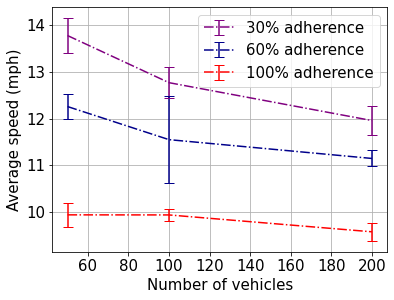

In [7]:
# Group data by adherence level
adherence_30 = data[data['AdherenceLevel'] == 30]
adherence_60 = data[data['AdherenceLevel'] == 60]
adherence_100 = data[data['AdherenceLevel'] == 100]

fig = plt.figure(figsize=[6.0, 4.5], linewidth=0.1)

adherence_30_runs = adherence_30[['Run1_av', 'Run2_av', 'Run3_av', 'Run4_av', 'Run5_av']]
adherence_30_std = np.std(adherence_30_runs, axis=1)


adherence_60_runs = adherence_60[['Run1_av', 'Run2_av', 'Run3_av', 'Run4_av', 'Run5_av']]
adherence_60_std = np.std(adherence_60_runs, axis=1)

adherence_100_runs = adherence_100[['Run1_av', 'Run2_av', 'Run3_av', 'Run4_av', 'Run5_av']]
adherence_100_std = np.std(adherence_100_runs, axis=1)


plt.errorbar(adherence_30['NumberOfVehicles'], adherence_30['E_ave'], yerr=adherence_30_std, capsize=5.0, label='30% adherence', color='purple', linestyle='-.')
plt.errorbar(adherence_60['NumberOfVehicles'], adherence_60['E_ave'], yerr=adherence_60_std, capsize=5.0,label='60% adherence', color='darkblue', linestyle='-.')
plt.errorbar(adherence_100['NumberOfVehicles'], adherence_100['E_ave'], yerr=adherence_100_std, capsize=5.0,label='100% adherence', color='red', linestyle='-.')
plt.xlabel('Number of vehicles', fontsize=15.0)
plt.ylabel('Average speed (mph)', fontsize=15.0)

plt.xticks(fontsize=15.0)
plt.yticks(fontsize=15.0)

plt.legend(fontsize=15.0)
plt.grid()
plt.savefig('av_speeds.png')
